# ENGR-E 221 Intelligent Systems I Fall 2023

## Lab 5 Unsupervised Learning Introduction to Clustering


**Introduction(10 minutes)** 

First, let's make synthetic data for clustering
```python
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.2, 0.2], random_state =9)
```

Now plot this data to see  how these blobs look like.
 
```python
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show() 
```
We can explore parameters of make blobs function to get different variations of blobs. e.g changing cluster_std, we can get blobs which are tightly packed or dispersed. 
Lets try different parameters for making blobs.

```python
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.5, 0.1], random_state =9)
```

Plot new blobs to see the difference.

You can learn more about this function and its parameters on following link

<https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html>


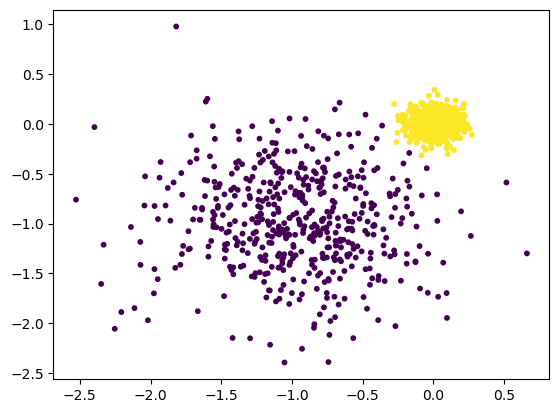

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.5, 0.1], random_state =1)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show()

**Task 1: Organize yourselves in CLUSTERS and Explore synthetic Data and visualizing it (10 minutes)** 

Using make_blob function from sklearn, Create a synthetic data set with four blobs with cluster_stds of 0.5,0.1,0.2,0.2.
Plot this dataset. Be able to describe your data/clusters to the class.
```python
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0],[-2,-2], [1,1]], cluster_std=[0.5, 0.1,0.2,0.2], random_state =1)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show()
```


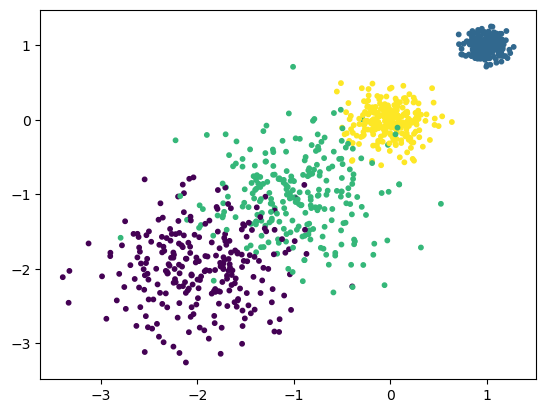

In [2]:
#task 1
rs = 9
from sklearn.datasets import make_blobs
import numpy as np
#Create a list with centers and then use it to create the centers in make_blobs
myCenters=[[-2,-2],[1,1],[-1,-1],[0,0]]
X, y = make_blobs(n_samples=1000,centers=myCenters, cluster_std=[0.5, 0.1,0.5,0.2], random_state =rs)
realCenters = np.array(myCenters)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show()

**Task 2: Dividing data in training and testing sets and exploring k-means (5 minutes)**  

Use sklearn train test split to divide data into training and test sets. Do we need this step or is there a way around it? Discuss.

Explore the documentation for kmeans in scikit learn and discuss what the algorithim needs as parameters and what it returns. Find one or two useful attributes and discuss how you could use them. [kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit)
```python
from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.cluster import KMeans
#run the Kmeans fit on the data
clu_kmeans=KMeans(n_clusters=4, random_state=1).fit(X_train)

#predict your y values/clusters for your test data
y_pred =clu_kmeans.predict(X_test)

#this allows us to find all the cluster centers/centroids
centers = clu_kmeans.cluster_centers_
```

In [3]:
# Task 2
from sklearn.model_selection import train_test_split
import numpy as np
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs)

from sklearn.cluster import KMeans
#run the Kmeans fit on the data
#include the list with centers as an initial cluster centroids in kmeans. This will force kmeans
#to converge on our centers rather than rely on randomization
clu_kmeans = KMeans(n_clusters=4,n_init=1, init = realCenters, random_state = rs).fit(X_train)
#clu_kmeans.fit(X_train)

#predict your y values/clusters for your test data
y_pred =clu_kmeans.predict(X_test)
#remember, if you are just interested in assigning clusters to your data:
#y_pred = clu.kmeans.fit_predict(X) #unsupervised technique

#this allows us to find all the cluster centers/centroids
centers_ = clu_kmeans.cluster_centers_



Now let's plot the data. We can change our plot markers to show the centroids, the training data, and the test data
```python
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.5)
plt.scatter(X[:,0],X[:,1], marker='^', alpha=0.1, c = y)
plt.show()
```

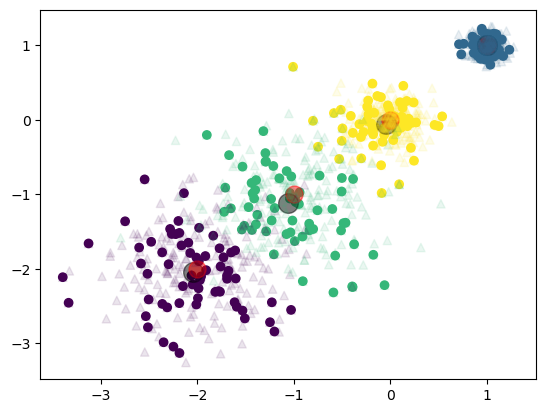

Centers found by Kmeans:
[[-2.04375544 -2.03769375]
 [ 1.00379207  1.00395631]
 [-1.05724682 -1.11313826]
 [-0.04877499 -0.05486922]]
Centers assigned:
[[-2 -2]
 [ 1  1]
 [-1 -1]
 [ 0  0]]


In [4]:
#task 2 (continued)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(centers_[:,0],centers_[:,1], c='black', s=200, alpha=0.5)
plt.scatter(realCenters[:,0],realCenters[:,1], c='red', s=150, alpha=0.5)
plt.scatter(X[:,0],X[:,1], marker='^', alpha=0.1, c = y)
plt.show()
print("Centers found by Kmeans:")
print(centers_)
print("Centers assigned:")
print(realCenters)


# **Task 3: Exploring K - How do we know how many clusters to use?**

Using the silhouette score as well as the "elbow" method, let's look to see how we could determine the ideal number of clusters.

We will use the Davies-Bouldin score and silhouette coefficient and explore how these values change across different clusters. 

Here is the documentation. 

[Silhouette Score Docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

[Davies Bouldin Score Docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html)

Then, we can try Kmeans++ implementation

```python
from sklearn import metrics
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters = 4, random_state = 1, n_init='auto').fit(X_train)
print("Silhouette Score (k= 4):",silhouette_score(X_train, model.labels_, metric='euclidean'))
print("Davies Bouldin (k= 4):",metrics.davies_bouldin_score(X_train, model.labels_))
print("WCSS (k= 4):",model.inertia_)

```

In [5]:
#Task 3
from sklearn import metrics
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters = 4, random_state = 1, n_init='auto').fit(X_train)
print("Silhouette Score (k= 4):",silhouette_score(X_train, model.labels_, metric='euclidean'))
print("Davies Bouldin (k= 4):",metrics.davies_bouldin_score(X_train, model.labels_))
print("WCSS (k= 4):",model.inertia_)


Silhouette Score (k= 4): 0.5994931341294082
Davies Bouldin (k= 4): 0.6271215680699438
WCSS (k= 4): 161.67281012790374


**MORE Task 3: Exploring K - How do we know how many clusters to use?**
Now let's loop through a range of K values to see if we can identify our best cluster number using our metrics.
```python
#Let's create a range of K (number of clusters) to test
K = range(2, 10)
#Since we are testing a range of K values, we need to keep track of all the scores/assessments to plot later
fits = []
score = []
wcss = []
db = []

#For each k value in our range of K, fit using Kmeans, append the model to our "fits" list, calculate the silhouette_score and wcss values into "scores" and "wcss"
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 1, n_init='auto').fit(X_train)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))
    
    db.append(metrics.davies_bouldin_score(X_train, model.labels_))

    wcss.append(model.inertia_)

#Plot our metrics
plt.plot(K, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(K, score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score over K')
plt.show()

plt.plot(K, db)
plt.title('Davies Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score over K')
plt.show()
```


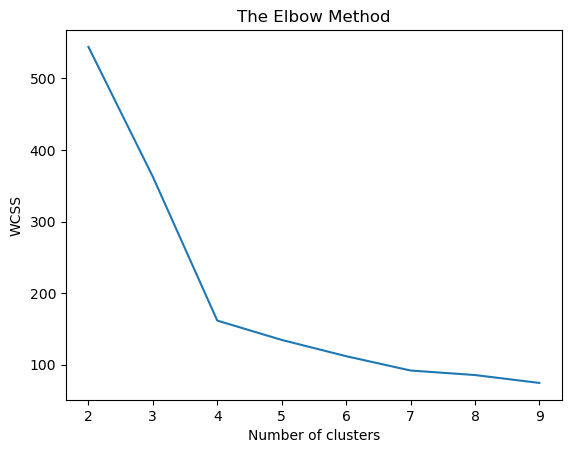

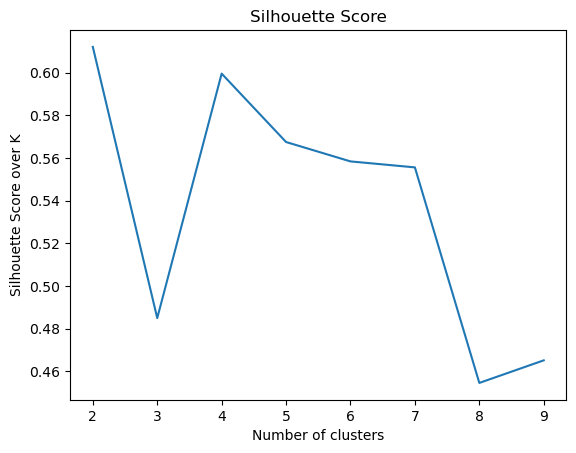

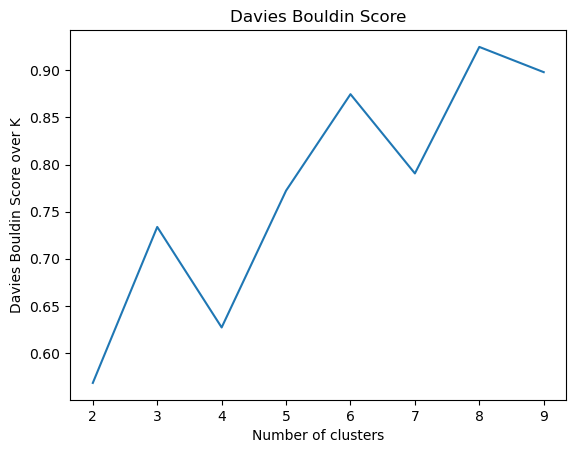

In [6]:
#task 3

from sklearn import metrics
from sklearn.metrics import silhouette_score
#Let's create a range of K (number of clusters) to test
K = range(2, 10)
#Since we are testing a range of K values, we need to keep track of all the scores/assessments to plot later
fits = []
score = []
wcss = []
db = []

#For each k value in our range of K, fit using Kmeans, append the model to our "fits" list, calculate the silhouette_score and wcss values into "scores" and "wcss"
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 1, n_init='auto').fit(X_train)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))
    
    db.append(metrics.davies_bouldin_score(X_train, model.labels_))

    wcss.append(model.inertia_)

#Plot our metrics
plt.plot(K, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(K, score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score over K')
plt.show()

plt.plot(K, db)
plt.title('Davies Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score over K')
plt.show()



Silhouette Score (k= 4): 0.5994931341294082
Davies Bouldin (k= 4): 0.6271215680699438
WCSS (k= 4): 161.67281012790374


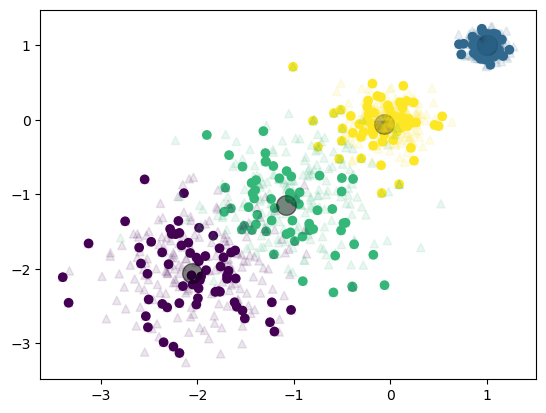

In [7]:
modelPP = KMeans(n_clusters = 4,init="k-means++", n_init='auto', random_state = 1).fit(X_train)
print("Silhouette Score (k= 4):",silhouette_score(X_train, modelPP.labels_, metric='euclidean'))
print("Davies Bouldin (k= 4):",metrics.davies_bouldin_score(X_train, modelPP.labels_))
print("WCSS (k= 4):",modelPP.inertia_)
y_predPP =modelPP.predict(X_test)

#this allows us to find all the cluster centers/centroids
centersPP = modelPP.cluster_centers_
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(centersPP[:,0],centersPP[:,1], c='black', s=200, alpha=0.5)
plt.scatter(X[:,0],X[:,1], marker='^', alpha=0.1, c = y)
plt.show()


**Task 4: Dendrograms and Agglomerative Clustering**

Now look at how we can use Dendrograms to inform our clusters.
```python
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()


from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], marker='o', s=10, c=y_hc)
plt.scatter(X_test[y_hc == 0, 0], X_test[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_hc == 1, 0], X_test[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test[y_hc == 2, 0], X_test[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test[y_hc == 3, 0], X_test[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters')
plt.legend()
plt.show()
```

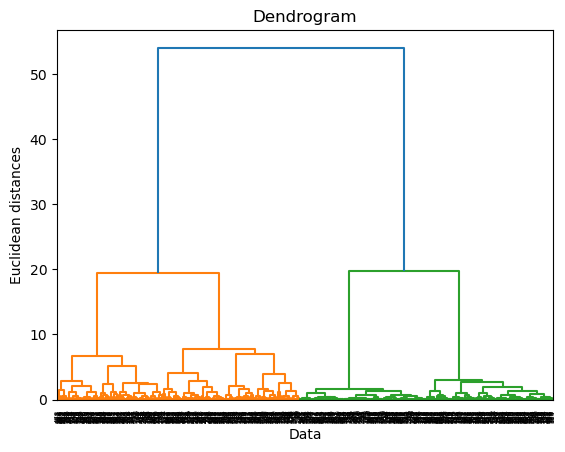

/Users/melovele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


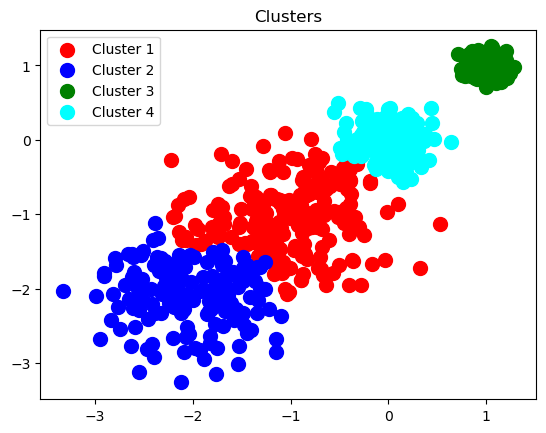

In [8]:
#task 4
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()


from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', s=10, c=y_hc)
plt.scatter(X_train[y_hc == 0, 0], X_train[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_hc == 1, 0], X_train[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_hc == 2, 0], X_train[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train[y_hc == 3, 0], X_train[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters')
plt.legend()
plt.show()


**Task 5: Assessment of the Model** 

Using our metrics library, compare our y_test values (true values) with the values our model predicted (y_pred) 

```python
# code here 
from sklearn.metrics import accuracy_score
print("KMeans (K = 4) Clustering")
score_k = accuracy_score(y_test, y_pred)
print('\n k=4: ',score_k)

```

In [9]:
#task 5
from sklearn.metrics import accuracy_score
print("KMeans (K = 4) Clustering")
score_k = accuracy_score(y_test, y_pred)
print('\n k=4: ',score_k)
print(y_test.shape)
print(y_test[0:10])
print(y_pred[0:10])





KMeans (K = 4) Clustering

 k=4:  0.912
(250,)
[2 3 1 0 3 0 0 1 1 2]
[2 3 1 0 3 2 0 1 1 2]


**Task 6: Exploring three dimensional data (15 minutes)**: 

Use make blob function to create two blobs with three input features (dimensions). Plot the blobs three times using 2 out of 3 features in one plot. It will help to look at clusters from different angles.Use K-mean clustering to fit this data and plot the assigned clusters from different view points. 

Assign an individual to show off these plots to the class. 

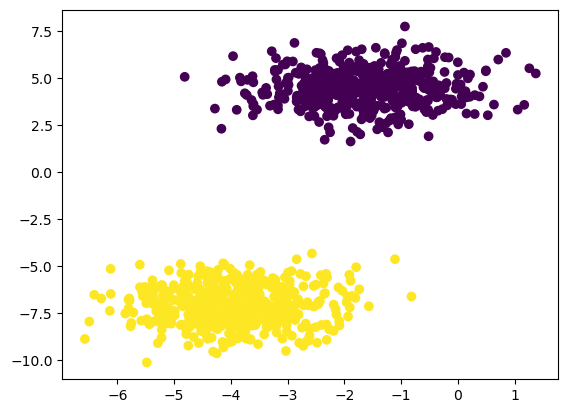

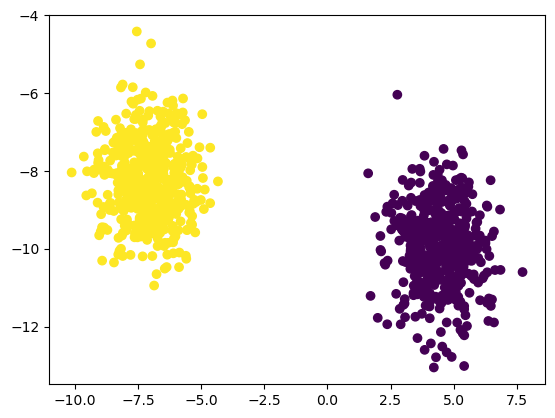

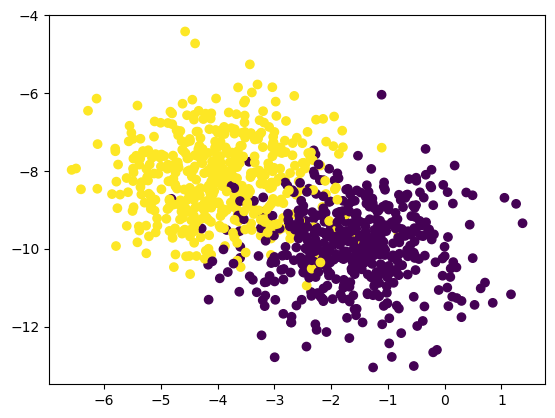

In [10]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=3, random_state=1)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.show()
plt.scatter(X[:,1], X[:,2], marker='o', c=y)
plt.show()
plt.scatter(X[:,0], X[:,2], marker='o', c=y)
plt.show()

**Task 7: Minibatch K-means(5 minutes)**  

MiniBatchKMeans is a version of KMeans algorithm which uses mini-batches to reduce the computation time. It is useful to use when dealing with large amounts of data. Use MiniBatchKMeans on data created in task 6. Here is the documentation [minibatch kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)


```python
from sklearn.cluster import MiniBatchKMeans
mini_batch= MiniBatchKMeans(n_clusters=2, random_state=9).fit(X)
```

/Users/melovele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


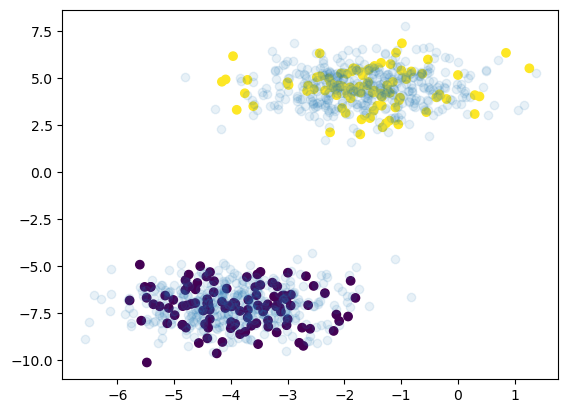

In [11]:
#Task 7
X_tr = X[:800,:]
X_test = X[800:,:]

from sklearn.cluster import MiniBatchKMeans
mini_batch= MiniBatchKMeans(n_clusters=2, random_state=9).fit(X_tr)

y_prediction = mini_batch.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:,1 ], c=y_prediction)
plt.scatter(X_tr[:, 0], X_tr[:,1 ], alpha = 0.1)
plt.show()